In [23]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


In [2]:
# 0 heart dis
# 1 no heart dis

In [3]:
df =pd.read_csv("./cleaned_df.csv",index_col=0)  #index_col=0
df.head(5)


# iloc, loc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [4]:
# age: The person’s age in years
# sex: The person’s sex (1 = male, 0 = female)  encoding -> label encoding
# cp: chest pain type
# — Value 0: asymptomatic
# — Value 1: atypical angina
# — Value 2: non-anginal pain
# — Value 3: typical angina
# trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
# chol: The person’s cholesterol measurement in mg/dl
# fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: resting electrocardiographic results
# — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
# — Value 1: normal
# — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# thalach: The person’s maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
# slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
# 0: downsloping; 1: flat; 2: upsloping
# ca: The number of major vessels (0–3)
# thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)
# target: Heart disease (1 = no, 0= yes)

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


In [7]:
#null values
df.isnull().sum()

# df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.194719,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,48.488324,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [10]:
# X_train

In [11]:
#split the data

y = df['target']
X = df.drop('target',axis=1)

#train test split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #X FEATURES Y, TARGET

# y_test = np.array(y_test)

scaler = StandardScaler()   #oop

#fit, transform, git_transform()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#.fit, transofm, fir tramSFOME 

In [12]:
X_train[0]

array([-0.26219622,  0.68313005,  2.05790037, -0.80304971, -1.14857919,
       -0.39735971, -1.0375122 ,  1.81428838, -0.70272837, -0.8892208 ,
       -0.66064553, -0.73612924, -2.20260483])

In [13]:
#baselining

In [35]:
#dummy classifer
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.6229508196721312

In [15]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)


# y_pred_log
#acc, f1, conf 
lr_acc_score = accuracy_score(y_test, y_pred_log)
lr_f1_score = f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)

#display 
print(f"Test Accuracy score : {lr_acc_score}")
print(f"Test F1 score : {lr_f1_score}")

print("++" * 10)
print(f"Confusion Matrix")
print(lr_conf_matrix)

print()
print("Classification Report")
print(classification_report(y_test, y_pred_log))

Test Accuracy score : 0.8688524590163934
Test F1 score : 0.8947368421052632
++++++++++++++++++++
Confusion Matrix
[[19  4]
 [ 4 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.89      0.89      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [16]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)


#acc, f1, conf 
tree_acc_score = accuracy_score(y_test, y_pred_tree)
tree_f1_score = f1_score(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

#display 
print(f"Test Accuracy score : {tree_acc_score}")
print(f"Test F1 score : {tree_f1_score}")

print("++" * 10)
print(f"Confusion Matrix")
print(tree_conf_matrix)

print()
print("Classification Report")
print(classification_report(y_test, y_pred_tree))

Test Accuracy score : 0.819672131147541
Test F1 score : 0.8450704225352113
++++++++++++++++++++
Confusion Matrix
[[20  3]
 [ 8 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.91      0.79      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61



[Text(0.5256410256410257, 0.9444444444444444, 'cp <= -0.398\ngini = 0.499\nsamples = 242\nvalue = [115, 127]'),
 Text(0.3141025641025641, 0.8333333333333334, 'ca <= -0.2\ngini = 0.389\nsamples = 121\nvalue = [89, 32]'),
 Text(0.19230769230769232, 0.7222222222222222, 'thal <= 0.312\ngini = 0.5\nsamples = 55\nvalue = [27, 28]'),
 Text(0.10256410256410256, 0.6111111111111112, 'exang <= 0.36\ngini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.05128205128205128, 0.5, 'thalach <= -2.243\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.02564102564102564, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07692307692307693, 0.3888888888888889, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.15384615384615385, 0.5, 'restecg <= -0.094\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.1282051282051282, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1794871794871795, 0.3888888888888889, 'slope <= 0.139\ngini = 0.42\nsamples = 10\nva

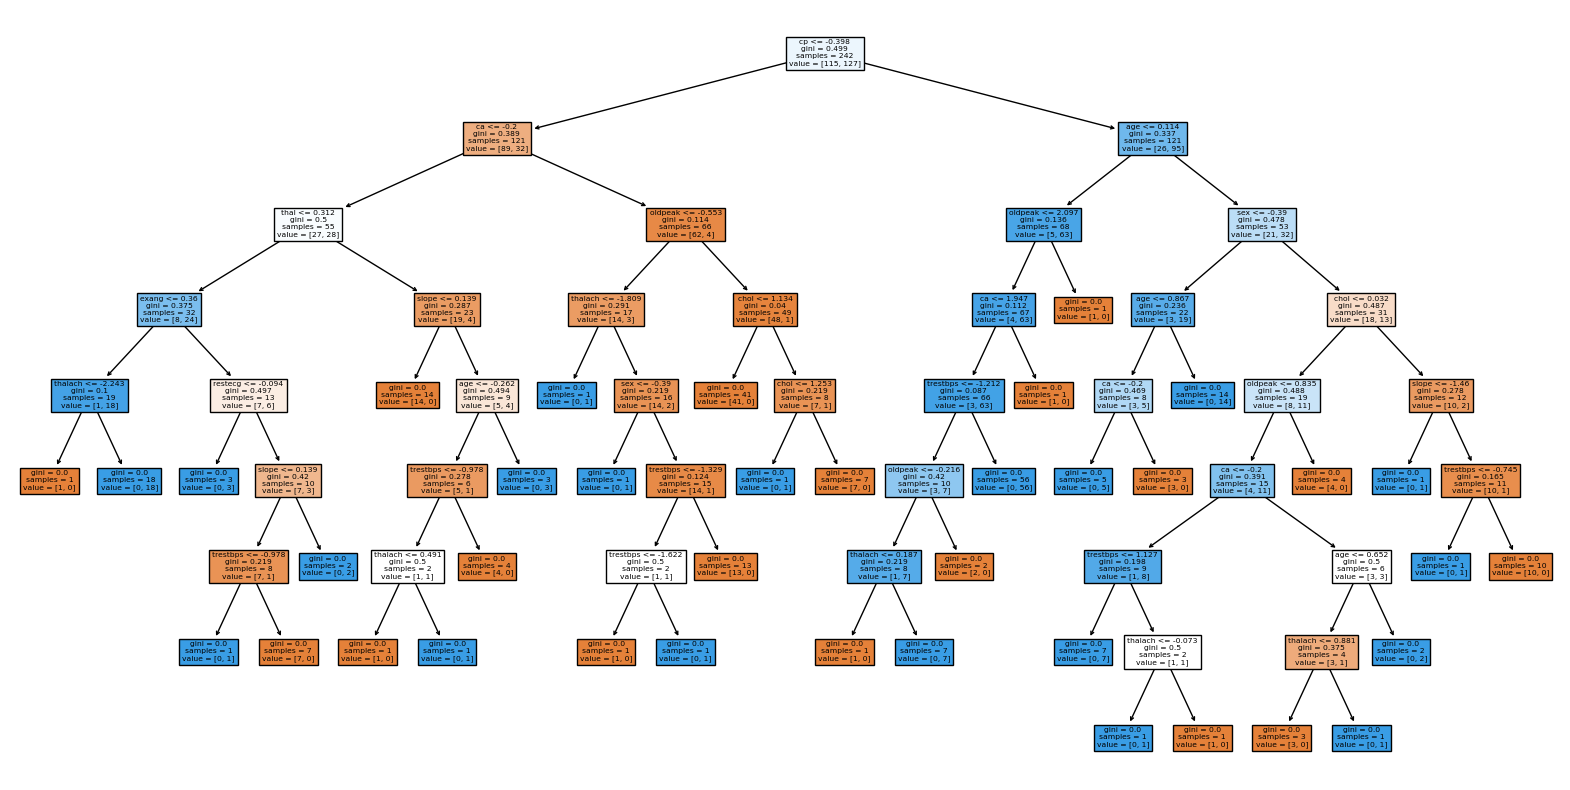

In [17]:
#DEcision can be visualised
tree.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True,feature_names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])

In [18]:
#Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_forest = rfc.predict(X_test)


#acc, f1, conf 
rfc_acc_score = accuracy_score(y_test, y_pred_forest)
rfc_f1_score = f1_score(y_test, y_pred_forest)
rfc_conf_matrix = confusion_matrix(y_test, y_pred_forest)

#display 
print(f"Test Accuracy score : {rfc_acc_score}")
print(f"Test F1 score : {rfc_f1_score}")

print("++" * 10)
print(f"Confusion Matrix")
print(rfc_conf_matrix)

print()
print("Classification Report")
print(classification_report(y_test, y_pred_forest))

Test Accuracy score : 0.8360655737704918
Test F1 score : 0.868421052631579
++++++++++++++++++++
Confusion Matrix
[[18  5]
 [ 5 33]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.87      0.87      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [19]:
#Naive bayes


nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)


#acc, f1, conf 
nb_acc_score = accuracy_score(y_test, y_pred_nb)
nb_f1_score = f1_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

#display 
print(f"Test Accuracy score : {nb_acc_score}")
print(f"Test F1 score : {nb_f1_score}")

print("++" * 10)
print(f"Confusion Matrix")
print(nb_conf_matrix)

print()
print("Classification Report")
print(classification_report(y_test, y_pred_nb))

Test Accuracy score : 0.8852459016393442
Test F1 score : 0.9090909090909091
++++++++++++++++++++
Confusion Matrix
[[19  4]
 [ 3 35]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.90      0.92      0.91        38

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.88        61
weighted avg       0.88      0.89      0.88        61



In [20]:
#COMBINED
model_perf = pd.DataFrame({"Model":["Dummy Classifier","Logistic Regression","Decision Tree","Random Forest","Naive Bayes"],
                          "Accuracy":[dummy_clf.score(X_test,y_test), lr_acc_score,tree_acc_score,rfc_acc_score, nb_acc_score]})

In [21]:
model_perf

,Model,Accuracy
0,Dummy Classifier,0.622951
1,Logistic Regression,0.868852
2,Decision Tree,0.819672
3,Random Forest,0.836066
4,Naive Bayes,0.885246


In [26]:
from sklearn.metrics import  roc_curve
#logisric reg
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_pred_log)

#dt
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, y_pred_tree)

#rfc
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_pred_forest)

#NB
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb)

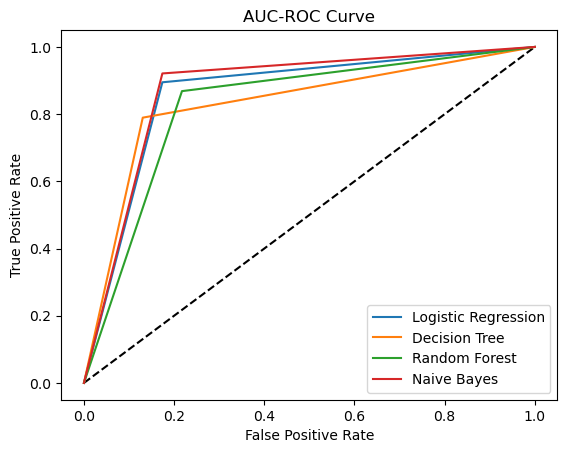

In [33]:
#plot AUC - ROC

plt.plot([0,1], [0,1], "--", color='black')
plt.plot(fpr_log,tpr_log, label="Logistic Regression")
plt.plot(fpr_tree,tpr_tree, label="Decision Tree")
plt.plot(fpr_rfc,tpr_rfc, label="Random Forest")
plt.plot(fpr_nb,tpr_nb, label="Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.title("AUC-ROC Curve")
plt.show()